# 4. Training Models

## Linear Regression

In [1]:
import numpy as np
np.random.seed(42)

- Lets create randomly generated linear dataset

In [2]:
# create random values in a given shape 100,1
X = 2 * np.random.rand(100,1)

# generate y values, add randomeness
# randn: Return a sample (or samples) from the “standard normal” distribution.
y = 4 + 3*X + np.random.randn(100,1)

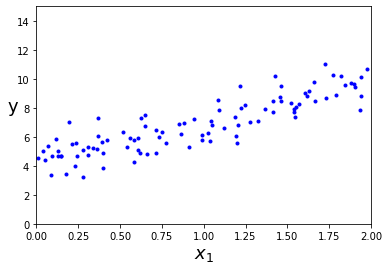

In [3]:
from matplotlib import pyplot as plt

# "b." : blue marker with dot shape
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("y", rotation = 0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

- Compute the θˆ using Normal Equation
- inv() function from NumPy’s linear algebra module (np.linalg) to compute the inverse of a matrix
- the dot() method for matrix multiplication

In [4]:
# create x0 vector consist of 1s. ( θ0 bias)
x0 = np.ones((100,1))

In [5]:
# add x0 = 1 to each instance (bias)
# we have x0 and x1
X_b = np.c_[x0,X]

In [6]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [7]:
theta_best

array([[4.21509616],
       [2.77011339]])

- We would have hoped for θ0 = 4 and θ1 = 3 instead of θ0 = 4.215 and θ1 = 2.770. Close enough, but the noise made it impossible to recover the exact parameters of the original function.

In [8]:
# create a new instances. these are x1 values of new 2 instances
X_new = np.array([[0],[2]])

In [9]:
X_new

array([[0],
       [2]])

In [10]:
# add x0 = 1 to each instance

X_new_b = np.c_[np.ones((2,1)), X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [11]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

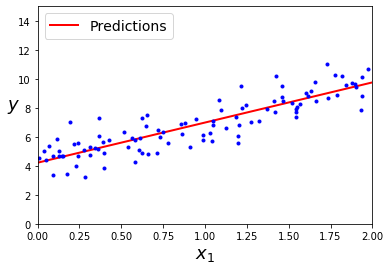

In [12]:
# plot red line
plt.plot(X_new,y_predict, 'r-', linewidth=2, label='Predictions')

#plot the blue points
plt.plot(X,y,'b.')

plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0,2,0,15])
plt.show()

- Perform same operations with scikitlearn linear regression

In [13]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y) #dont need to introduce x0 manually

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Intercept:', lin_reg.intercept_)
print('Coefficient:', lin_reg.coef_)

Intercept: [4.21509616]
Coefficient: [[2.77011339]]


In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

## Gradient Descent

### Batch Gradient Descent

In [16]:
np.random.seed(42)
eta = 0.1 # learning rate
n_iterations = 1000
m = 100 #number of instances

# normally, there is only 1 feature (x1), but because of bias we created theta0 and theta1 (2 values)
theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - eta*gradient

theta

array([[4.21509616],
       [2.77011339]])

In [17]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

- The result is exactly same with Normal Equation result.
- Gradient Decent worked perfectly.
- What if you had used a different learning rate eta ?

In [18]:

theta_path_bgd = [] # will keep theta values after each iteration

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X,y,'b.')
    n_iterations = 1000
    
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'   # show iteration 0 as red with dashed line, others blue with line
            plt.plot(X_new, y_predict, style)          # show x1 and y plot (note X_new includes 2 instances. This is enough for plotting line)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients
        if theta_path is not None:
            theta_path.append(theta)
        
    plt.xlabel('$x_1$', fontsize=18)
    plt.ylabel('$y$',rotation=0, fontsize=18)
    #plt.axis([0, 2, 0, 15])    # I made it commented to see how each line is converged. Otherwise, lines in third plot are not visible.
    plt.title(r'$\eta= {}$'.format(eta), fontsize=16)
    

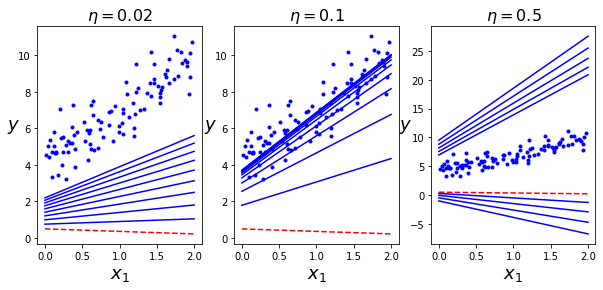

In [19]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)

# keep the theta values only for learnin rate=0.1 (the best learning rate)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

Note: the red line shows the first iteration
- On the left, the learning rate is too low: the algorithm will eventually reach the solution, but it will take a long time
- In the middle, the learning rate looks pretty good: in just a few iterations, it has already converged to the solution.
-  On the right, the learning rate is too high: the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step.

- see how theta values are converged.
- theta_path_bgd contains 1000 theta values

In [20]:
theta_path_bgd[0:2]

[array([[1.78737583],
        [1.27927812]]),
 array([[2.55330471],
        [2.10402371]])]

In [21]:
theta_path_bgd[998:1000]

[array([[4.21509616],
        [2.77011339]]),
 array([[4.21509616],
        [2.77011339]])]

### Stochastic Gradient Descent

In [22]:
theta_path_sgd = [] # will keep theta values after each iteration
m = len(X_b)
np.random.seed(42)

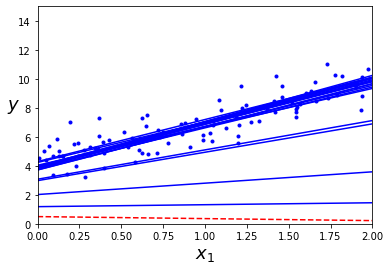

In [23]:
n_epochs = 100 # number of iterations
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t+t1)

theta = np.random.randn(2,1) #random initialization

# m is number of instances
# by convention we iterate by rounds of m iterations, each round is called an epoch.
# note: it is not has to be m times. this is just convention.


for epoch in range(n_epochs):
    for i in range(m): 
        if epoch == 0 and i<20:                   # to plot first 10 line
            y_predict = X_new_b.dot(theta)
            style = 'b-' if i > 0 else 'r--'
            plt.plot(X_new, y_predict,style)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1] # not use X_b[random_index] to make it 2D 
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        
        eta = learning_schedule(epoch*m + i) # start with high learning rate, gradually decrease.
        theta = theta - eta*gradients
        theta_path_sgd.append(theta)

plt.plot(X,y,'b.')
plt.xlabel('$x_1$', fontsize=18)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.axis([0,2,0,15])
plt.show()

In [24]:
theta

array([[4.19058927],
       [2.770769  ]])

- To perform Linear Regression using Stochastic GD with Scikit-Learn, you can use the SGDRegressor class, which defaults to optimizing the squared error cost function.
- The following code runs for maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3).
- It starts with a learning rate of 0.1 (eta0=0.1), using the default learning schedule
- Lastly, it does not use any regularization (penalty=None)

In [2]:
from sklearn.linear_model import SGDRegressor


sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

sgd_reg.fit(X,y.ravel())

NameError: name 'X' is not defined

In [26]:
print(r'Intercept: {}'.format(sgd_reg.intercept_))
print(r'Slope: {}'.format(sgd_reg.coef_))

Intercept: [4.26273952]
Slope: [2.85344601]


In [27]:
sgd_reg.predict(X_new)

array([4.26273952, 9.96963154])

### Mini-Batch Gradient Descent

In [28]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [29]:
theta

array([[4.25214635],
       [2.7896408 ]])

**Evaluation**

In [30]:
# lets get all the theta values from each step found by different methods
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

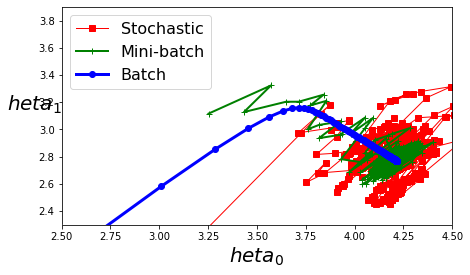

In [31]:
plt.figure(figsize=(7,4))

plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1, label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")

plt.legend(loc='upper left', fontsize=16)
plt.xlabel('$\theta_0$', fontsize=20)
plt.ylabel('$\theta_1$', fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

- Figure shows the paths taken by the three Gradient Descent algorithms in parameter space during training
- They all end up near the minimum, but Batch GD’s path actually stops at the minimum, while both Stochastic GD and Mini-batch GD continue to walk around. 
- However, don’t forget that Batch GD takes a lot of time to take each step, and Stochastic GD and Mini-batch GD would also reach the minimum if you used a good learning schedule.

## Polynomial Regression

- What if your data is more complex than a straight line?
- Surprisingly, you can use a linear model to fit nonlinear data.
- A simple way to do this is to add powers of each feature as new features, then train a linear model on this extended set of features.

In [32]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100,1)

Text(0, 0.5, '$y$')

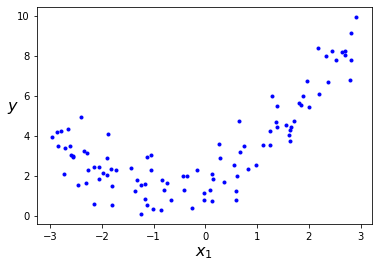

In [33]:
plt.plot(X,y, 'b.')

plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$y$',rotation=0,fontsize=16)

- A straight line will never fit this data properly. 
- Scikit-Learn's PolynomialFeatures class to transform our training data, adding the square (second-degree polynomial) of each feature in the training set as a new feature. (in this case there is just one feature)

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [35]:
X[0]

array([-0.75275929])

In [36]:
# we will see two values since new feature x2 was added
X_poly[0]

array([-0.75275929,  0.56664654])

In [37]:
# Then, you can use linear regression model

lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)
print(r'Intercept: {}'.format(lin_reg.intercept_))
print(r'Slope: {}'.format(lin_reg.coef_))

Intercept: [1.78134581]
Slope: [[0.93366893 0.56456263]]


- the model estimates yˆ=0.56x1^2 +0.93x1 +1.78 
- the original function was y = 0.5x1^2 + x1 + 2 + Gaussian noise

In [38]:
# Create x values for testing prediction,
# linspace returns evenly spaced 100 values between -3 and 3
X_new=np.linspace(-3, 3, 100).reshape(100, 1)

In [39]:
# add x square as new feature
X_new_poly = poly_features.transform(X_new)

In [40]:
y_new = lin_reg.predict(X_new_poly)

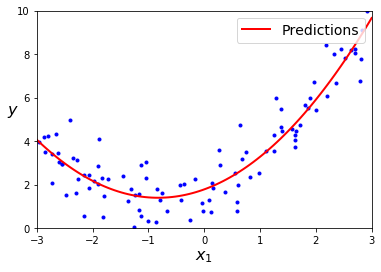

In [41]:

plt.plot(X,y, 'b.')
# use X_new_poly when predicting, but for plotting use X_new.
# X_new_poly includes extra information which is not originally present in the dataset
plt.plot(X_new, y_new, 'r-', linewidth=2,label='Predictions')
plt.xlabel('$x_1$',fontsize=16)
plt.ylabel('$y$',rotation=0,fontsize=16)
plt.axis([-3, 3, 0, 10])
plt.legend(loc='upper right', fontsize=14)

Note:
- PolynomialFeatures also adds all combinations of the features up to the given degree.
 - For example, if there were two features a and b, PolynomialFeatures with degree=3 would not only add the features a^2, a^2, b^2, and b^3, but also the combinations ab, a^2b, and ab^2.

#### Learning Curves

- If you perform high-degree Polynomial Regression, you will likely fit the training data much better than with plain Linear Regression.
-  For example, figure applies a 300-degree polynomial model to the preceding training data, and compares the result with a pure linear model and a quadratic model (second-degree polynomial). Notice how the 300-degree polynomial model wiggles around to get as close as possible to the training instances.

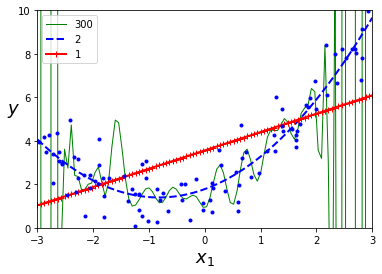

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# plot the lines for 300 degree, 2 degree, and 1 degree (linear regression)
for style, width, degree in (('g-',1,300), ('b--',2,2), ('r-+',2,1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
        ('poly_features', polybig_features),
        ('std_scaler', std_scaler),
        ('lin_reg', lin_reg)
    ])
    
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

- This high-degree Polynomial Regression model is severely **overfitting** the training data, while the linear model is **underfitting** it.
- The model that will generalize best in this case is the quadratic model, which makes sense because the data was generated using a quadratic model.
- In Chapter 2 you used cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

- **Learning Curve** is another way.
- These are plots of the model's performance on the training set and the validation set as a function of training set size (or the training iteration)
- To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:

In [43]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    np.random.seed(42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)  
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)      

[0, 80, 0, 3]

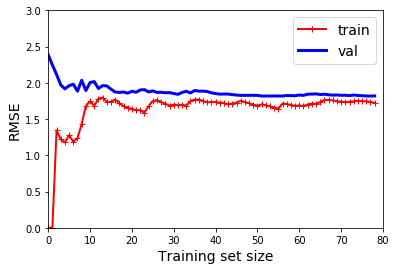

In [44]:
plot_learning_curves(lin_reg,X,y)
plt.axis([0, 80, 0, 3])

- We have seen that linear model is underfitting by looking at x1 y scatter plot.
- How can we interpret Learning Curve? 
- Let's look at the performance on the training data
     - when there are just one or two instances in the training set, the model can fit them perfectly. (RMSE is too low)
     - But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all.
     - So the error on the traiing data goes up until it reaches a plateau, at which point adding new instances to the training set does not make the average error much better or worse. 


- Let's look at the performance of the model on the validation data.
     - when the model istrained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big.
     - Then, as the model is shown more training examples, it learns, and ths the validation error slowly goes down.
 
**However**, once again a straight line (linear model) cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve.

**These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.**

- **IMPORTANT: If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come up with better features.**

- Now lets look at the learning curves of a 10th degree polynomial model on the same data.

[0, 80, 0, 3]

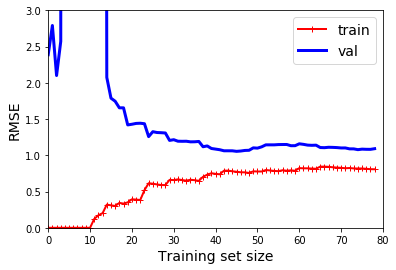

In [45]:
# create a pipeline which enriches the data with PolynomialFeatures method which adds 10th degree
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg',lin_reg)
])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])

These learning curves look a bit like the previous ones, but there are two very important differences:
- The error on the training data is much lower than with the Linear Regression model. (previous chart)
- There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

**IMPORTANT**: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error.

## REGULARIZED LINEAR MODELS

- A good way to reduce overfitting is to regularize the model
- For a polynomial model, A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.
- For a linear model, regularization is typically achieved by constraining the weights of the model. 

**Ridge Regression**

- Adding regularization term to cost function
- This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. 

In [47]:
# create a dataset

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1) # input to model
y = 1 + 0.5 * X + np.random.randn(m,1) / 1.5 # y labels. last terms is for bias coming from normal dist.
X_new = np.linspace(0,3,100).reshape(100,1) # new X values to predict y values

In [50]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver='cholesky', random_state=42)
ridge_reg.fit(X,y)

#Ex
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [51]:
# try another solver

ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

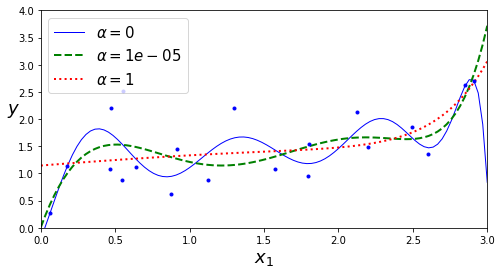

In [59]:
# Lets plot a chart that shows differences for different alpha values
# Ridge regularization for Polynomial Regression to regularize and prevent overfitting



def plot_model(model_class, alphas, **model_kargs):
    
    for alpha, style in zip(alphas, ('b-', 'g--','r:')):
        # if alpha = 0, implement normal regression instead RidgeRegression
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        # To convert it to Polynomial implement the PolynomialFeatures
        model = Pipeline([
            ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
            ('std_scaler', StandardScaler()),
            ('regul_reg', model)
        ])

        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        linewidth = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=linewidth, label=r"$\alpha = {}$".format(alpha))
    
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plot_model(Ridge, alphas=(0, 10**-5, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()


- Note how increasing α leads to flatter (i.e., less extreme, more reasonable) predictions, thus reducing the model’s variance but increasing its bias.

- Let's implement Ridge Regression with **SGD**
- the penalty hyperparamaters sets the type of regularization term to use.

In [68]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

# Note: sgd expects 1d array, that s why y is flattened with ravel function

array([1.46820908])

**Lasso Regression** (Least Absolute Shrikage and Selection Opeartor Regression)

- It adds a regularization term to the cost function, but it uses the l1 norm of the weight vector

C:\Anaconda3\envs\tf_env\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.802867703827432, tolerance: 0.0009294783355207351
  positive)


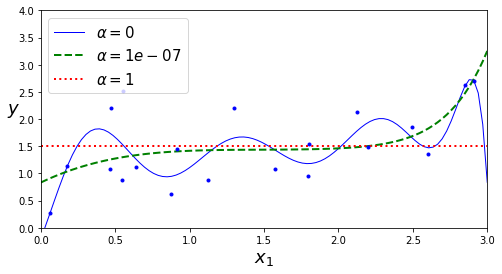

In [70]:
from sklearn.linear_model import Lasso
# Lets plot a chart that shows differences for different alpha values
# Lasso regularization for Polynomial Regression to regularize and prevent overfitting

plt.figure(figsize=(8,4))
plot_model(Lasso, alphas=(0, 10**-7, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.show()

- An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e set them to zero)
- For example, the dashed line looks linear, all the weights for the high degree polynomial features are equal to zero.
- In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e with few nonzero feature weights)

In [71]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [3]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l1')
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

NameError: name 'X' is not defined

**Elastic Net**

- It is a middle ground between Ridge and Lasso Regression.
- The regularization term is a simple mix of both Ridge and Lasso's regularization terms.  (mix ratio is controlled with r)
- When r=0, Elastic Net is equivalent to Ridge Regression, and when r=1, it is equivalent to Lasso Regression.

In [73]:
from sklearn.linear_model import ElasticNet

#l1_ratio is mix ratio r in the cost function of ElasticNet.
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

**Evaluation of different regularization methods**

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net?
1. plain Linear Regression (without any regularization)
2. Ridge Regression
3. Lasso Regression
4. Elastic Net

- It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression.
- Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero.
-  In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

**Early Stopping**

- A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is called early stopping.
- Figure shows a complex model (in this case, a high-degree Polynomial Regression model) being trained with Batch Gradient Descent. As the epochs go by the algorithm learns, and its prediction error (RMSE) on the training set goes down, along with its prediction error on the validation set. After a while though, the validation error stops decreasing and starts to go back up. This indicates that the model has started to overfit the training data. With early stopping you just stop training as soon as the validation error reaches the minimum. 

In [79]:

np.random.seed(42)
m = 100 #number of instances
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [80]:
X_train.shape

(25, 1)

In [104]:
from copy import deepcopy # will be used to copy best model

poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val) # remember: do not implement fit to validation set

# set number of epochs (max_iter) as 1, since we will run epochs manually with for loop
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                      penalty=None, learning_rate='constant', eta0=0.0005, random_state=42)

minimum_validation_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off thanks to warm_start=True parameter
    y_val_predict = sgd_reg.predict(X_val_poly_scaler)
    val_error = mean_squared_error(y_val_predict, y_val)
    
    # if this is the best so far, keep it
    if val_error < minimum_validation_error:
        minimum_validation_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [105]:
best_epoch

239

In [106]:
X_train[0]

array([-2.06403288])

In [107]:
y_train[0]

2.42319555422591

In [108]:
best_model.predict(X_train_poly_scaled[0:1])

array([2.29348068])

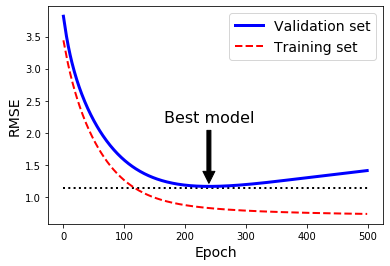

In [110]:
## another example, just for showing in  the graph

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Logistic Regression

- Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class
- If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).
- This makes it a binary classifier.

[-10, 10, -0.1, 1.1]

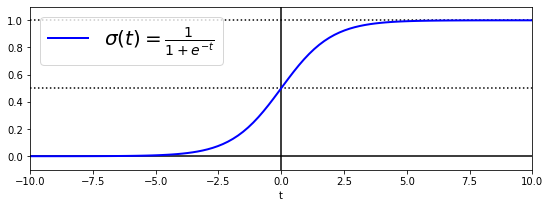

In [143]:
# just for figure
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

**Ex:** Let’s try to build a classifier to detect the Iris virginica type (binary classifier; virginica or not) based only on the petal width feature.

In [112]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [113]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [115]:
# we interest only with petal width feature
X = iris["data"][:,3:] # petal width

In [120]:
# create a target dataset which 1 if instance is Iris Virginica, else 0.
# In the dataset, virginica is labelled as 2
# iris["target"] == 2 returns True,False; astype turns it to 0,1
y = (iris["target"] == 2).astype(np.int)

In [121]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [133]:
# create a dataset for implementing prediction
# generate 1000 values which are between 0 and 3
X_new = np.linspace(0,3,1000).reshape(-1,1)

y_proba = log_reg.predict_proba(X_new)

In [136]:
# first element represents, prability of not being virginica
# second element represents, probability of being virginica
y_proba

array([[9.99250016e-01, 7.49984089e-04],
       [9.99240201e-01, 7.59799387e-04],
       [9.99230257e-01, 7.69743043e-04],
       ...,
       [3.08374822e-03, 9.96916252e-01],
       [3.04400296e-03, 9.96955997e-01],
       [3.00476842e-03, 9.96995232e-01]])

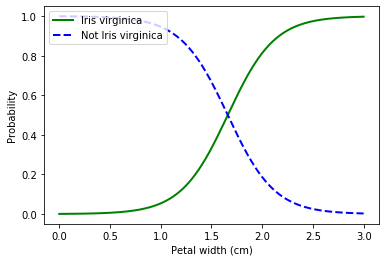

In [148]:
plt.plot(X_new, y_proba[:,1], 'g-', linewidth =2, label="Iris virginica")
plt.plot(X_new, y_proba[:,0], 'b--', linewidth=2, label="Not Iris virginica")

plt.xlabel('Petal width (cm)', fontsize=10)
plt.ylabel('Probability', fontsize=10)
plt.legend(loc="upper left", fontsize=10)

- The **decision boundary** is around petal width = 1.6.
- The probability of being virginica is higher than the probability of not being virginica after around petal width = 1.6
- If you use, **predict** instead of **predict_proba** to see class

In [153]:
# it will predict 1,
log_reg.predict([[1.7]])

array([1])

In [154]:
# it will predict 0,
log_reg.predict([[1.5]])

array([0])

In [168]:
# find the X values where probability of being virginica is >= 0.6
# then, get the first value that satisfies this condition
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]
decision_boundary

array([1.66066066])

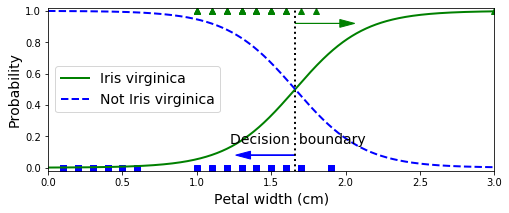

In [163]:
# better figure

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

**NOTE:** 
- Just like the other linear models, Logistic Regression models can be regularized using l1 or l2 penalties.
- Scikit-learn adds an l2 penalty by default.
- The hyperparameter controlling the regularization strength of a LogisticRegression model is not alpha(as in other linear models), but C.
 - The higher the value of C, the less the model is regularized.

- What if there are more than 1 feature ?
- The decision boundary will be linear

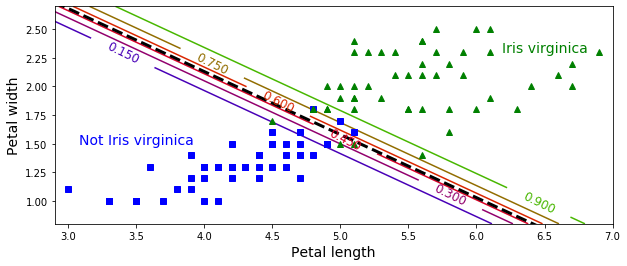

In [169]:
# EXAMPLE
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

# draw the decision boundaries
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)




# draw the boundary at 0.5
left_right = np.array([2.9, 7])

#choose arbitary x0 values, one from beginning, one from end
# At the middle line (where probability is 0.5), the score (x.T.dot(theta)=0 see below comments)
# so theta_0 + theta_1*x0 + theta_2*x1 = 0
#    theta_0 + theta_1*x0 = - theta_2*x1
#    -(theta_0 + theta_1*x0) / theta_2 = x1

boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]
plt.plot(left_right, boundary, "k--", linewidth=3)



plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

- The dashed line represents the points where the model estimates a 50% probability: this is the model’s decision boundary. 
- Each parallel line represents the points where the model outputs a specific probability, from 15% (bottom left) to 90% (top right).
- All the flowers beyond the top-right line have an over 90% chance of being Iris virginica, according to the model.
- The regions are separated from the decision boundary line at 0.5. (black dashed line)
    - At that point, $x^\top.\theta$ is equal to 0.
    - So, $\hat{\rho}=\sigma(x^\top.\theta)=0.5$

### Softmax Regression

- The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers
- This is called Softmax Regression, or Multinomial Logistic Regression.

-  Scikit-Learn’s LogisticRegression uses one-versus-the-rest by default when you train it on more than two classes, but you can set the multi_class hyperparameter to "multinomial" to switch it to Softmax Regression.
- You must also specify a solver that supports Softmax Regression, such as the "lbfgs" solver
- It also applies **ℓ2** regularization by default, which you can control using the hyperparameter C

In [183]:
X = iris['data'][:, (2,3)] # take 2 features, petal length, petal width
y = iris['target']

In [184]:
softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
# Lets predict an instance in which petal length = 5, and petal width = 2
# It predicts it as virginica (Class 2)
softmax_reg.predict([[5,2]])

array([2])

In [186]:
# it will answer Iris virginica (class 2) with 94.2% probability (or Iris versicolor with 5.8% probability):
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

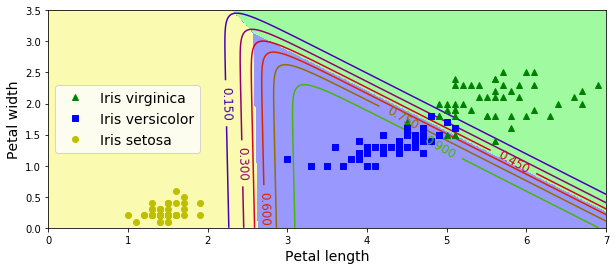

In [188]:
# Figure
# multiclass with multi features (2 features)

x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape) #for decision boundaries
zz = y_predict.reshape(x0.shape) #for regions

plt.figure(figsize=(10, 4))

plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

- Figure shows the resulting decision boundaries, represented by the background colors. 
- Notice that the decision boundaries between any two classes are linear.
- The figure also shows the probabilities for the Iris versicolor class (class 1), represented by the curved lines (e.g., the line labeled with 0.450 represents the 45% probability boundary).
- At the point where all decision boundaries meet, all classes have an equal estimated probability of 33%.

EXERCISES

1. What Linear Regression training algorithm can you use if you have a training set
with millions of features?
2. Suppose the features in your training set have very different scales. What algorithms
might suffer from this, and how? What can you do about it?
3. Can Gradient Descent get stuck in a local minimum when training a Logistic
Regression model?
4. Do all Gradient Descent algorithms lead to the same model provided you let
them run long enough?
5. Suppose you use Batch Gradient Descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what is
likely going on? How can you fix this?
6. Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation
error goes up?
7. Which Gradient Descent algorithm (among those we discussed) will reach the
vicinity of the optimal solution the fastest? Which will actually converge? How
can you make the others converge as well?
8. Suppose you are using Polynomial Regression. You plot the learning curves and
you notice that there is a large gap between the training error and the validation
error. What is happening? What are three ways to solve this?
9. Suppose you are using Ridge Regression and you notice that the training error
and the validation error are almost equal and fairly high. Would you say that the
model suffers from high bias or high variance? Should you increase the regularization
hyperparameter α or reduce it?
10. Why would you want to use:
• Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
• Lasso instead of Ridge Regression?
• Elastic Net instead of Lasso?
11. Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.
Should you implement two Logistic Regression classifiers or one Softmax Regression
classifier?
12. Implement Batch Gradient Descent with early stopping for Softmax Regression
(without using Scikit-Learn).


ANSWERS

1. If you have a training set with millions of features you can use Stochastic Gradient Descent or Minibatch
Gradient Descent, and perhaps Batch Gradient Descent if the training set fits in memory. But
you cannot use the Normal Equation because the computational complexity grows quickly (more than
quadratically) with the number of features.
2. If the features in your training set have very different scales, the cost function will have the shape of
an elongated bowl, so the Gradient Descent algorithms will take a long time to converge. To solve
this you should scale the data before training the model. Note that the Normal Equation will work
just fine without scaling. Moreover, regularized models may converge to a suboptimal solution if the
features are not scaled: indeed, since regularization penalizes large weights, features with smaller
values will tend to be ignored compared to features with larger values.
3. Gradient Descent cannot get stuck in a local minimum when training a Logistic Regression model
because the cost function is convex.1
4. If the optimization problem is convex (such as Linear Regression or Logistic Regression), and
assuming the learning rate is not too high, then all Gradient Descent algorithms will approach the
global optimum and end up producing fairly similar models. However, unless you gradually reduce
the learning rate, Stochastic GD and Mini-batch GD will never truly converge; instead, they will
keep jumping back and forth around the global optimum. This means that even if you let them run for
a very long time, these Gradient Descent algorithms will produce slightly different models.
5. If the validation error consistently goes up after every epoch, then one possibility is that the learning
rate is too high and the algorithm is diverging. If the training error also goes up, then this is clearly
the problem and you should reduce the learning rate. However, if the training error is not going up,
then your model is overfitting the training set and you should stop training.
6. Due to their random nature, neither Stochastic Gradient Descent nor Mini-batch Gradient Descent is
guaranteed to make progress at every single training iteration. So if you immediately stop training
when the validation error goes up, you may stop much too early, before the optimum is reached. A
better option is to save the model at regular intervals, and when it has not improved for a long time
(meaning it will probably never beat the record), you can revert to the best saved model.
7. Stochastic Gradient Descent has the fastest training iteration since it considers only one training
instance at a time, so it is generally the first to reach the vicinity of the global optimum (or Minibatch
GD with a very small mini-batch size). However, only Batch Gradient Descent will actually
converge, given enough training time. As mentioned, Stochastic GD and Mini-batch GD will bounce
around the optimum, unless you gradually reduce the learning rate.
8. If the validation error is much higher than the training error, this is likely because your model is
overfitting the training set. One way to try to fix this is to reduce the polynomial degree: a model
with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the
model — for example, by adding an ℓ2 penalty (Ridge) or an ℓ1 penalty (Lasso) to the cost function.
This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of
the training set.
9. If both the training error and the validation error are almost equal and fairly high, the model is likely
underfitting the training set, which means it has a high bias. You should try reducing the
regularization hyperparameter α.
10. Let’s see:
A model with some regularization typically performs better than a model without any
regularization, so you should generally prefer Ridge Regression over plain Linear Regression.2
Lasso Regression uses an ℓ1 penalty, which tends to push the weights down to exactly zero.
This leads to sparse models, where all weights are zero except for the most important weights.
This is a way to perform feature selection automatically, which is good if you suspect that only
a few features actually matter. When you are not sure, you should prefer Ridge Regression.
Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases
(when several features are strongly correlated or when there are more features than training
instances). However, it does add an extra hyperparameter to tune. If you just want Lasso
without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.
11. If you want to classify pictures as outdoor/indoor and daytime/nighttime, since these are not
exclusive classes (i.e., all four combinations are possible) you should train two Logistic Regression
classifiers.

**12. Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn)**

In [189]:
# load the data
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']

Add the bias term for every instance ($x_0 = 1$):

In [190]:
X_with_bias = np.c_[np.ones([len(X),1]), X]

In [196]:
# see how it looks like
X_with_bias[0:3]

array([[1. , 1.4, 0.2],
       [1. , 1.4, 0.2],
       [1. , 1.3, 0.2]])

In [235]:
# And let's set the random seed so the output of this exercise solution is reproducible:
np.random.seed(2042)

The easiest option to split the dataset into a training set, a validation set and a test set would be to use Scikit-Learn's train_test_split() function, but the point of this exercise is to try understand the algorithms by implementing them manually. So here is one possible implementation:

In [236]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - (test_size + validation_size)

# Generate random permutations of indices
# Ex: np.random.permutation(5) >>> array([2, 1, 4, 0, 3])
rnd_indices = np.random.permutation(total_size)


X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]

X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]

X_test = X_with_bias[rnd_indices[:-test_size]]
y_test = y[rnd_indices[:-test_size]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [237]:
def to_one_hot(y):
    n_classes = y.max()+1
    m = len(y) #number of instances
    Y_one_hot = np.zeros((m,n_classes)) #create a matrix (m x n_classes) with all zeros
    Y_one_hot[np.arange(m), y] = 1 # fill the correct classes with 1
    
    return Y_one_hot
    

Let's test this function on the first 10 instances:

In [238]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [240]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

See how it works, with an example ------------------------------------------------------

In [228]:
y_ex = np.array([[0,0,0,0,0,0,0,0,1,2]])
y_ex

array([[0, 0, 0, 0, 0, 0, 0, 0, 1, 2]])

In [ ]:
#create a matrix (m x n_classes) with all zeros
matrix = np.zeros((10,3))
matrix

In [ ]:
np.arange(10)

In [242]:
# fill the correct classes with 1
matrix[np.arange(10),y_ex] = 1

In [243]:
matrix

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

------------------------------------------------------

So let's create the target class probabilities matrix for the training set and the test set:

In [244]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

Now let's implement the Softmax function. Recall that it is defined by the following equation:

Note: logit is $s_k(\mathbf{x})$


$\sigma\left(\mathbf{s}(\mathbf{x})\right)_k = \dfrac{\exp\left(s_k(\mathbf{x})\right)}{\sum\limits_{j=1}^{K}{\exp\left(s_j(\mathbf{x})\right)}}$

In [246]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

We are almost ready to start training. Let's define the number of inputs and outputs:

In [247]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [248]:
# to see the values
n_inputs, n_outputs

(3, 3)

Now here comes the hardest part: training! Theoretically, it's simple: it's just a matter of translating the math equations into Python code. But in practice, it can be quite tricky: in particular, it's easy to mix up the order of the terms, or the indices. You can even end up with code that looks like it's working but is actually not computing exactly the right thing. When unsure, you should write down the shape of each term in the equation and make sure the corresponding terms in your code match closely. It can also help to evaluate each term independently and print them out. The good news it that you won't have to do this everyday, since all this is well implemented by Scikit-Learn, but it will help you understand what's going on under the hood.

So the equations we will need are the cost function:

$J(\mathbf{\Theta})$ = $- \dfrac{1}{m} \sum\limits_{i=1}^{m} \sum\limits_{k=1}^{K} {y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$


And the equation for the gradients:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting nan values.

In [249]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

#n_inputs is the number of features (including bias)
#n_outputs is the number of classes
Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693313
2000 0.5444496861981873
2500 0.5038530181431525
3000 0.4729228972192248
3500 0.4482424418895776
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390373


And that's it! The Softmax model is trained. Let's look at the model parameters:

In [250]:
theta

array([[4.25214635],
       [2.7896408 ]])

Let's make predictions for the validation set and check the accuracy score:

In [252]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
Y_proba

array([[0.91590904, 0.07574412, 0.00834684],
       [0.0094535 , 0.35535128, 0.63519523],
       [0.85760359, 0.12619716, 0.01619926],
       [0.86679689, 0.1200384 , 0.01316471],
       [0.18053423, 0.56850607, 0.25095969],
       [0.00232609, 0.36093987, 0.63673404],
       [0.00184675, 0.20376711, 0.79438614],
       [0.83656765, 0.13899025, 0.0244421 ],
       [0.88625401, 0.10077854, 0.01296745],
       [0.87261512, 0.11287796, 0.01450692],
       [0.04115575, 0.56422484, 0.39461941],
       [0.01936555, 0.50197044, 0.47866401],
       [0.01424778, 0.38949262, 0.5962596 ],
       [0.00974409, 0.3921235 , 0.59813242],
       [0.05228127, 0.59296778, 0.35475095],
       [0.27251404, 0.47867605, 0.24880991],
       [0.00419878, 0.22887872, 0.7669225 ],
       [0.09246683, 0.63098776, 0.27654541],
       [0.00205562, 0.25995682, 0.73798756],
       [0.22171753, 0.53953849, 0.23874397],
       [0.87261512, 0.11287796, 0.01450692],
       [0.02820109, 0.49657451, 0.4752244 ],
       [0.

In [254]:
y_predict = np.argmax(Y_proba,axis=1)
y_predict

array([0, 2, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1,
       2, 2, 1, 0, 0, 1, 1, 1], dtype=int64)

In [255]:
accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9666666666666667

Well, this model looks pretty good. For the sake of the exercise, let's add a bit of $\ell_2$ regularization. The following training code is similar to the one above, but the loss now has an additional $\ell_2$ penalty, and the gradients have the proper additional term (note that we don't regularize the first element of Theta since this corresponds to the bias term). Also, let's try increasing the learning rate eta.

In [256]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    if iteration % 500 == 0:
        print(iteration, loss)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.48929905984511984
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


Because of the additional $\ell_2$ penalty, the loss seems greater than earlier, but perhaps this model will perform better? Let's find out:

In [257]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Cool, perfect accuracy! We probably just got lucky with this validation set, but still, it's pleasant.

Now let's add early stopping. For this we just need to measure the loss on the validation set at every iteration and stop when the error starts growing.

In [258]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.infty

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633519
1000 0.5435638529109127
1500 0.5355752782580262
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327975 early stopping!


In [259]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

1.0

Still perfect, but faster.

Now let's plot the model's predictions on the whole dataset:

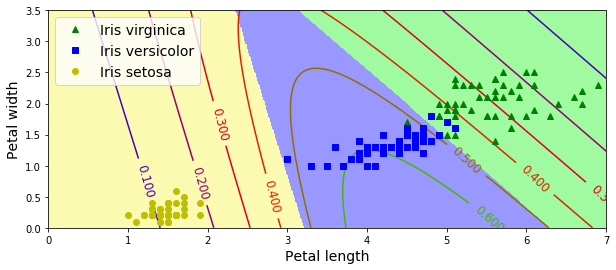

In [260]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

#contour lines for the probability of being in class 1
zz1 = Y_proba[:, 1].reshape(x0.shape)

# for regions
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()


And now let's measure the final model's accuracy on the test set:

In [261]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

0.9833333333333333

Our perfect model turns out to have slight imperfections. This variability is likely due to the very small size of the dataset: depending on how you sample the training set, validation set and the test set, you can get quite different results. Try changing the random seed and running the code again a few times, you will see that the results will vary.